## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9771784	total: 68.2ms	remaining: 1m 8s
1:	learn: 0.9570755	total: 69.2ms	remaining: 34.5s
2:	learn: 0.9383924	total: 70.2ms	remaining: 23.3s
3:	learn: 0.9239760	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9070226	total: 72.1ms	remaining: 14.3s
5:	learn: 0.8937690	total: 73ms	remaining: 12.1s
6:	learn: 0.8801431	total: 74ms	remaining: 10.5s
7:	learn: 0.8643585	total: 74.9ms	remaining: 9.29s
8:	learn: 0.8492741	total: 75.7ms	remaining: 8.34s
9:	learn: 0.8336312	total: 76.7ms	remaining: 7.6s
10:	learn: 0.8185877	total: 77.6ms	remaining: 6.97s
11:	learn: 0.8037447	total: 78.4ms	remaining: 6.46s
12:	learn: 0.7891958	total: 79.3ms	remaining: 6.02s
13:	learn: 0.7747282	total: 80.2ms	remaining: 5.65s
14:	learn: 0.7632245	total: 81ms	remaining: 5.32s
15:	learn: 0.7508992	total: 81.9ms	remaining: 5.04s
16:	learn: 0.7378701	total: 82.7ms	remaining: 4.78s
17:	learn: 0.7269041	total: 83.5ms	remaining: 4.55s
18:	learn: 0.7153300	total: 84.3ms	remaining: 4.35s

49:	learn: 0.4659299	total: 109ms	remaining: 2.08s
50:	learn: 0.4606147	total: 110ms	remaining: 2.05s
51:	learn: 0.4562519	total: 111ms	remaining: 2.03s
52:	learn: 0.4506091	total: 112ms	remaining: 2s
53:	learn: 0.4475413	total: 113ms	remaining: 1.98s
54:	learn: 0.4428147	total: 114ms	remaining: 1.95s
55:	learn: 0.4391675	total: 114ms	remaining: 1.93s
56:	learn: 0.4355187	total: 115ms	remaining: 1.91s
57:	learn: 0.4311343	total: 116ms	remaining: 1.88s
58:	learn: 0.4267831	total: 117ms	remaining: 1.86s
59:	learn: 0.4241960	total: 118ms	remaining: 1.84s
60:	learn: 0.4199555	total: 118ms	remaining: 1.82s
61:	learn: 0.4161663	total: 119ms	remaining: 1.8s
62:	learn: 0.4132958	total: 120ms	remaining: 1.79s
63:	learn: 0.4095639	total: 121ms	remaining: 1.77s
64:	learn: 0.4064652	total: 123ms	remaining: 1.76s
65:	learn: 0.4025559	total: 123ms	remaining: 1.75s
66:	learn: 0.3991280	total: 124ms	remaining: 1.73s
67:	learn: 0.3954703	total: 125ms	remaining: 1.71s
68:	learn: 0.3923016	total: 126ms	r

147:	learn: 0.2646742	total: 193ms	remaining: 1.11s
148:	learn: 0.2638908	total: 194ms	remaining: 1.1s
149:	learn: 0.2630948	total: 195ms	remaining: 1.1s
150:	learn: 0.2621203	total: 195ms	remaining: 1.1s
151:	learn: 0.2613159	total: 196ms	remaining: 1.09s
152:	learn: 0.2604429	total: 197ms	remaining: 1.09s
153:	learn: 0.2597374	total: 198ms	remaining: 1.09s
154:	learn: 0.2590814	total: 199ms	remaining: 1.08s
155:	learn: 0.2582715	total: 199ms	remaining: 1.08s
156:	learn: 0.2573177	total: 200ms	remaining: 1.07s
157:	learn: 0.2564371	total: 201ms	remaining: 1.07s
158:	learn: 0.2557569	total: 202ms	remaining: 1.07s
159:	learn: 0.2551937	total: 203ms	remaining: 1.06s
160:	learn: 0.2543190	total: 204ms	remaining: 1.06s
161:	learn: 0.2536211	total: 204ms	remaining: 1.06s
162:	learn: 0.2530507	total: 205ms	remaining: 1.05s
163:	learn: 0.2524151	total: 206ms	remaining: 1.05s
164:	learn: 0.2519249	total: 207ms	remaining: 1.05s
165:	learn: 0.2513775	total: 208ms	remaining: 1.04s
166:	learn: 0.2

278:	learn: 0.1890218	total: 300ms	remaining: 776ms
279:	learn: 0.1887387	total: 301ms	remaining: 774ms
280:	learn: 0.1881796	total: 302ms	remaining: 773ms
281:	learn: 0.1877273	total: 303ms	remaining: 771ms
282:	learn: 0.1872673	total: 303ms	remaining: 769ms
283:	learn: 0.1870311	total: 304ms	remaining: 767ms
284:	learn: 0.1865366	total: 305ms	remaining: 766ms
285:	learn: 0.1861804	total: 306ms	remaining: 764ms
286:	learn: 0.1856154	total: 307ms	remaining: 762ms
287:	learn: 0.1853868	total: 307ms	remaining: 760ms
288:	learn: 0.1851364	total: 308ms	remaining: 759ms
289:	learn: 0.1848016	total: 309ms	remaining: 757ms
290:	learn: 0.1842399	total: 310ms	remaining: 756ms
291:	learn: 0.1839065	total: 311ms	remaining: 754ms
292:	learn: 0.1833458	total: 312ms	remaining: 753ms
293:	learn: 0.1828319	total: 313ms	remaining: 751ms
294:	learn: 0.1824062	total: 314ms	remaining: 749ms
295:	learn: 0.1821980	total: 314ms	remaining: 748ms
296:	learn: 0.1819841	total: 315ms	remaining: 746ms
297:	learn: 

378:	learn: 0.1523003	total: 383ms	remaining: 628ms
379:	learn: 0.1520147	total: 384ms	remaining: 627ms
380:	learn: 0.1518103	total: 385ms	remaining: 626ms
381:	learn: 0.1514678	total: 386ms	remaining: 624ms
382:	learn: 0.1511208	total: 387ms	remaining: 623ms
383:	learn: 0.1509557	total: 387ms	remaining: 622ms
384:	learn: 0.1506391	total: 388ms	remaining: 620ms
385:	learn: 0.1504841	total: 389ms	remaining: 619ms
386:	learn: 0.1503192	total: 390ms	remaining: 617ms
387:	learn: 0.1499839	total: 391ms	remaining: 616ms
388:	learn: 0.1498202	total: 391ms	remaining: 615ms
389:	learn: 0.1494683	total: 392ms	remaining: 614ms
390:	learn: 0.1491548	total: 393ms	remaining: 612ms
391:	learn: 0.1488885	total: 394ms	remaining: 611ms
392:	learn: 0.1486827	total: 395ms	remaining: 610ms
393:	learn: 0.1483674	total: 395ms	remaining: 608ms
394:	learn: 0.1480546	total: 396ms	remaining: 607ms
395:	learn: 0.1476243	total: 397ms	remaining: 606ms
396:	learn: 0.1472908	total: 398ms	remaining: 604ms
397:	learn: 

486:	learn: 0.1257606	total: 473ms	remaining: 498ms
487:	learn: 0.1255466	total: 474ms	remaining: 497ms
488:	learn: 0.1253252	total: 475ms	remaining: 496ms
489:	learn: 0.1249466	total: 476ms	remaining: 495ms
490:	learn: 0.1247181	total: 476ms	remaining: 494ms
491:	learn: 0.1246650	total: 477ms	remaining: 493ms
492:	learn: 0.1243400	total: 478ms	remaining: 492ms
493:	learn: 0.1242412	total: 479ms	remaining: 491ms
494:	learn: 0.1240884	total: 480ms	remaining: 490ms
495:	learn: 0.1238232	total: 481ms	remaining: 488ms
496:	learn: 0.1236512	total: 481ms	remaining: 487ms
497:	learn: 0.1236265	total: 482ms	remaining: 486ms
498:	learn: 0.1234762	total: 483ms	remaining: 485ms
499:	learn: 0.1231889	total: 484ms	remaining: 484ms
500:	learn: 0.1230686	total: 485ms	remaining: 483ms
501:	learn: 0.1228913	total: 485ms	remaining: 481ms
502:	learn: 0.1228607	total: 486ms	remaining: 480ms
503:	learn: 0.1227022	total: 487ms	remaining: 479ms
504:	learn: 0.1226226	total: 488ms	remaining: 478ms
505:	learn: 

587:	learn: 0.1075512	total: 556ms	remaining: 389ms
588:	learn: 0.1073145	total: 557ms	remaining: 388ms
589:	learn: 0.1071820	total: 557ms	remaining: 387ms
590:	learn: 0.1070262	total: 558ms	remaining: 386ms
591:	learn: 0.1068111	total: 559ms	remaining: 385ms
592:	learn: 0.1066289	total: 560ms	remaining: 384ms
593:	learn: 0.1064902	total: 561ms	remaining: 383ms
594:	learn: 0.1063159	total: 562ms	remaining: 382ms
595:	learn: 0.1060711	total: 562ms	remaining: 381ms
596:	learn: 0.1059328	total: 563ms	remaining: 380ms
597:	learn: 0.1056830	total: 564ms	remaining: 379ms
598:	learn: 0.1055324	total: 565ms	remaining: 378ms
599:	learn: 0.1054102	total: 566ms	remaining: 377ms
600:	learn: 0.1053200	total: 566ms	remaining: 376ms
601:	learn: 0.1052634	total: 567ms	remaining: 375ms
602:	learn: 0.1050783	total: 568ms	remaining: 374ms
603:	learn: 0.1048766	total: 569ms	remaining: 373ms
604:	learn: 0.1048523	total: 570ms	remaining: 372ms
605:	learn: 0.1045641	total: 570ms	remaining: 371ms
606:	learn: 

717:	learn: 0.0882055	total: 663ms	remaining: 261ms
718:	learn: 0.0880294	total: 664ms	remaining: 260ms
719:	learn: 0.0878887	total: 665ms	remaining: 259ms
720:	learn: 0.0877269	total: 666ms	remaining: 258ms
721:	learn: 0.0876283	total: 667ms	remaining: 257ms
722:	learn: 0.0874474	total: 668ms	remaining: 256ms
723:	learn: 0.0873257	total: 668ms	remaining: 255ms
724:	learn: 0.0871697	total: 669ms	remaining: 254ms
725:	learn: 0.0869852	total: 670ms	remaining: 253ms
726:	learn: 0.0869481	total: 671ms	remaining: 252ms
727:	learn: 0.0868627	total: 672ms	remaining: 251ms
728:	learn: 0.0866918	total: 672ms	remaining: 250ms
729:	learn: 0.0866009	total: 673ms	remaining: 249ms
730:	learn: 0.0864370	total: 674ms	remaining: 248ms
731:	learn: 0.0863968	total: 675ms	remaining: 247ms
732:	learn: 0.0863097	total: 675ms	remaining: 246ms
733:	learn: 0.0862096	total: 676ms	remaining: 245ms
734:	learn: 0.0861648	total: 677ms	remaining: 244ms
735:	learn: 0.0860367	total: 678ms	remaining: 243ms
736:	learn: 

816:	learn: 0.0768162	total: 745ms	remaining: 167ms
817:	learn: 0.0767456	total: 746ms	remaining: 166ms
818:	learn: 0.0765689	total: 748ms	remaining: 165ms
819:	learn: 0.0764346	total: 749ms	remaining: 164ms
820:	learn: 0.0762969	total: 750ms	remaining: 163ms
821:	learn: 0.0761870	total: 750ms	remaining: 162ms
822:	learn: 0.0760358	total: 751ms	remaining: 162ms
823:	learn: 0.0760270	total: 752ms	remaining: 161ms
824:	learn: 0.0759012	total: 753ms	remaining: 160ms
825:	learn: 0.0758529	total: 753ms	remaining: 159ms
826:	learn: 0.0757279	total: 754ms	remaining: 158ms
827:	learn: 0.0756406	total: 755ms	remaining: 157ms
828:	learn: 0.0754785	total: 756ms	remaining: 156ms
829:	learn: 0.0753358	total: 757ms	remaining: 155ms
830:	learn: 0.0751797	total: 758ms	remaining: 154ms
831:	learn: 0.0751512	total: 758ms	remaining: 153ms
832:	learn: 0.0751179	total: 759ms	remaining: 152ms
833:	learn: 0.0750943	total: 760ms	remaining: 151ms
834:	learn: 0.0749586	total: 761ms	remaining: 150ms
835:	learn: 

947:	learn: 0.0637295	total: 854ms	remaining: 46.8ms
948:	learn: 0.0636552	total: 855ms	remaining: 45.9ms
949:	learn: 0.0635314	total: 855ms	remaining: 45ms
950:	learn: 0.0634590	total: 856ms	remaining: 44.1ms
951:	learn: 0.0633937	total: 857ms	remaining: 43.2ms
952:	learn: 0.0632953	total: 858ms	remaining: 42.3ms
953:	learn: 0.0632255	total: 859ms	remaining: 41.4ms
954:	learn: 0.0630821	total: 859ms	remaining: 40.5ms
955:	learn: 0.0630551	total: 860ms	remaining: 39.6ms
956:	learn: 0.0629667	total: 861ms	remaining: 38.7ms
957:	learn: 0.0629043	total: 862ms	remaining: 37.8ms
958:	learn: 0.0628685	total: 863ms	remaining: 36.9ms
959:	learn: 0.0627750	total: 864ms	remaining: 36ms
960:	learn: 0.0626856	total: 864ms	remaining: 35.1ms
961:	learn: 0.0625595	total: 865ms	remaining: 34.2ms
962:	learn: 0.0624499	total: 866ms	remaining: 33.3ms
963:	learn: 0.0623896	total: 867ms	remaining: 32.4ms
964:	learn: 0.0623042	total: 868ms	remaining: 31.5ms
965:	learn: 0.0622337	total: 868ms	remaining: 30.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

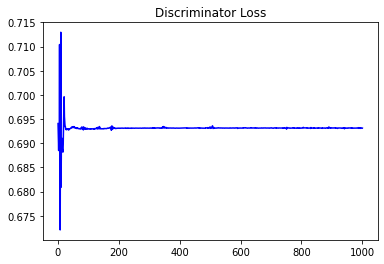

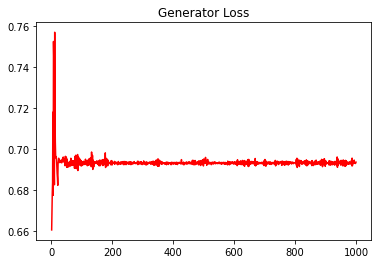

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09018436837199086


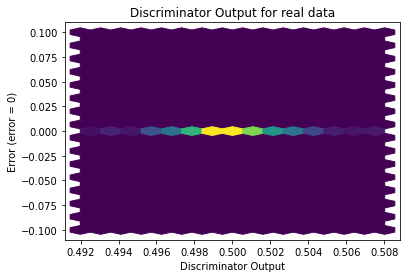

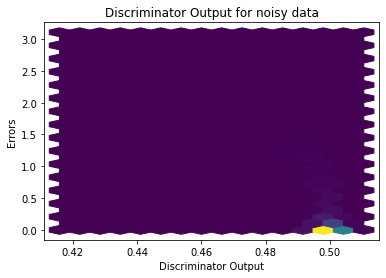

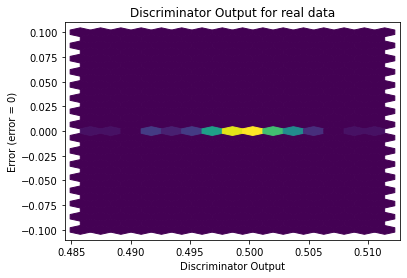

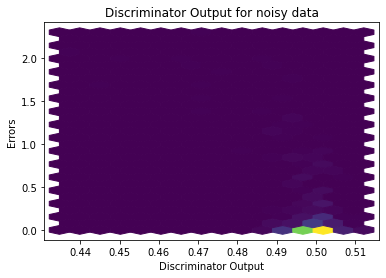

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


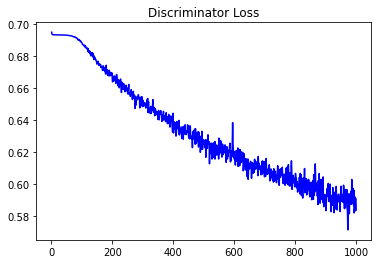

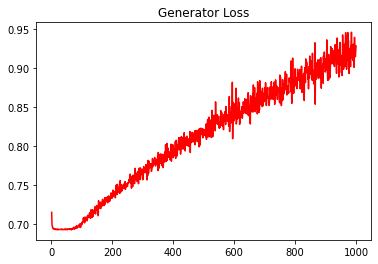

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0778705082036976


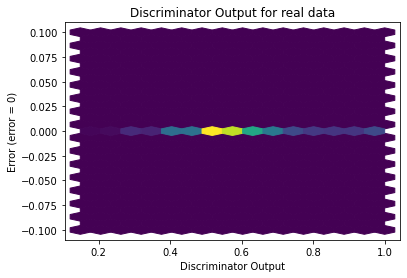

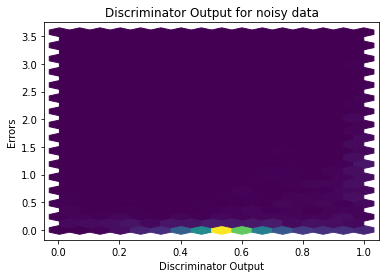

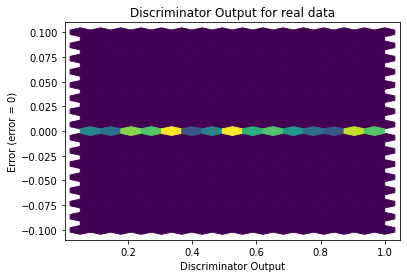

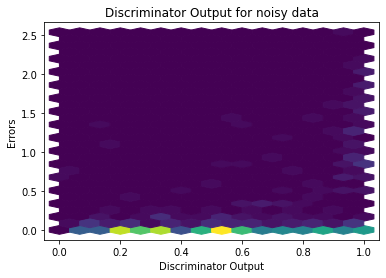

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
